<a href="https://colab.research.google.com/github/AmithReddyKasarla/AmithReddy_INFO5502_-Spring2022/blob/main/lab_assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The tenth Lab-assignment (04/28/2022, 50 points in total)

The purpose of this assignment is to practice normal distribution and annotation quality evaluation.

### Question 1 (25 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/unt-iialab/info5502-spring2022/blob/main/datasets/lab10-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [53]:
# your code here
!pip install pyforest
import pyforest

In [54]:
df= pd.read_csv('https://raw.githubusercontent.com/unt-iialab/info5502-spring2022/main/datasets/lab10-dataset.csv')

<IPython.core.display.Javascript object>

In [55]:
df

,Title of Article,Contributions,Source,Annotation1,Annotation2,Annotation3,Year
0,The measurement of ÒinterdisciplinarityÓ and Ò...,"In this study, we discuss recent advances in t...",JASIST,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
1,Innovation adoption: Broadcasting versus virality,broadcasting and virality have similar diffusi...,JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
2,Discovering underlying sensations of human emo...,we report the results of our study on sensatio...,JASIST,Theory proposal\n,Algorithms/ Methods Construction or Optimization,Theory proposal\n,NaN
3,Discovering underlying sensations of human emo...,"in the second part of the paper, we define nov...",JASIST,Theory proposal\n,Theory proposal\n,Theory proposal\n,NaN
4,Discovering underlying sensations of human emo...,we design a method to classify texts into ones...,JASIST,Algorithms/ Methods Construction or Optimization,Model Construction or Optimization,Algorithms/ Methods Construction or Optimization,NaN
...,...,...,...,...,...,...,...
3393,The impact of personality traits on usersÕ inf...,Personality traits drive information seeking d...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3394,The impact of personality traits on usersÕ inf...,Eye-movement parameters can predict these patt...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3395,The impact of personality traits on usersÕ inf...,Prior domain knowledge improves older adultsÕ ...,IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0
3396,The impact of personality traits on usersÕ inf...,"Unlike prior results, older adults were outper...",IPM,Theory proposal\n,Theory proposal\n,Theory proposal\n,2017.0


In [56]:
df['Annotation1']

0       Algorithms/ Methods Construction or Optimization
1                                      Theory proposal\n
2                                      Theory proposal\n
3                                      Theory proposal\n
4       Algorithms/ Methods Construction or Optimization
                              ...                       
3393                                   Theory proposal\n
3394                                   Theory proposal\n
3395                                   Theory proposal\n
3396                                   Theory proposal\n
3397                                   Theory proposal\n
Name: Annotation1, Length: 3398, dtype: object

In [57]:
df['Annotation1'].replace(r'\n',' ',inplace =True)
df['Annotation1'].replace(r'/',' ',inplace =True)

In [58]:
df['Annotation1'].unique()

array(['Algorithms/ Methods Construction or Optimization',
       'Theory proposal\n', 'Model Construction or Optimization',
       'Resources', 'Performance Evaluation', 'Dataset creation ',
       'Applications', ' "Theory proposal\n"'], dtype=object)

In [59]:
df['Annotation1']=df['Annotation1'].str.strip()
df['Annotation2']=df['Annotation2'].str.strip()
df['Annotation3']=df['Annotation3'].str.strip()


In [60]:
values=[]
for i in range(1,4):
  for value in df['Annotation'+str(i)].unique():
    if value not in values:
      values.append(value)
print(values)

['Algorithms/ Methods Construction or Optimization', 'Theory proposal', 'Model Construction or Optimization', 'Resources', 'Performance Evaluation', 'Dataset creation', 'Applications', '"Theory proposal\n"']


In [61]:
label=dict()
temp=1
for value in values:
  label[temp]=value
  temp+=1
print(label)

{1: 'Algorithms/ Methods Construction or Optimization', 2: 'Theory proposal', 3: 'Model Construction or Optimization', 4: 'Resources', 5: 'Performance Evaluation', 6: 'Dataset creation', 7: 'Applications', 8: '"Theory proposal\n"'}


In [62]:
for key in label:
  df.loc[df.Annotation1 == label[key], 'Annotation1_new'] = key
  df.loc[df.Annotation2 == label[key], 'Annotation2_new'] = key
  df.loc[df.Annotation3 == label[key], 'Annotation3_new'] = key
print(df.head().to_string())

                                                                                           Title of Article                                                                                                                                                                                                                                                                                               Contributions  Source                                       Annotation1                                       Annotation2                                       Annotation3  Year  Annotation1_new  Annotation2_new  Annotation3_new
0  The measurement of ÒinterdisciplinarityÓ and ÒsynergyÓ in scientific and extra_scientific collaborations                                                                                                                 In this study, we discuss recent advances in the operationalization and measurement of Òinterdisciplinarity,Ó and propose a methodology for measuring Òsynerg

In [63]:
print('Agreement Between Annotator 1 and Annotator 2')
#Now I am calculating Observed agreement
observedAgreement=len(df[df['Annotation1_new']==df['Annotation2_new']])/len(df['Annotation1_new'])
print('Observed Agreement',observedAgreement)

Agreement Between Annotator 1 and Annotator 2
Observed Agreement 0.5712183637433784


In [64]:
#Here I am calculating Chance agreement
chanceAgreement=((len(df[df['Annotation1_new']==1])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==1])/len(df['Annotation2_new'])))\
+((len(df[df['Annotation1_new']==2])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==2])/len(df['Annotation2_new'])))\
+((len(df[df['Annotation1_new']==3])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==3])/len(df['Annotation2_new'])))\
+((len(df[df['Annotation1_new']==4])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==4])/len(df['Annotation2_new'])))\
+((len(df[df['Annotation1_new']==5])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==5])/len(df['Annotation2_new'])))\
+((len(df[df['Annotation1_new']==6])/len(df['Annotation1_new']))*(len(df[df['Annotation2_new']==6])/len(df['Annotation2_new'])))
print('Chance Agreement',chanceAgreement)

Chance Agreement 0.2488316708821205


In [65]:
#Here I am calculating cohen kappa score
score1=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score1)

Cohen's Kappa Score 0.42918035860197506


In [66]:
print('Agreement Between Annotator 2 and Annotator 3')
#Here calculating Observed agreement
observedAgreement=len(df[df['Annotation2_new']==df['Annotation3_new']])/len(df['Annotation2_new'])
print('Observed Agreement',observedAgreement)

Agreement Between Annotator 2 and Annotator 3
Observed Agreement 0.6439081812831077


In [67]:
#Now calculating Chance agreement
chanceAgreement=((len(df[df['Annotation2_new']==1])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==1])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation2_new']==2])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==2])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation2_new']==3])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==3])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation2_new']==4])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==4])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation2_new']==5])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==5])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation2_new']==6])/len(df['Annotation2_new']))*(len(df[df['Annotation3_new']==6])/len(df['Annotation3_new'])))
print('Chance Agreement',chanceAgreement)

Chance Agreement 0.2566239670810063


In [68]:
#calculating the cohen kappa score
score2=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score2)

Cohen's Kappa Score 0.5209802267654008


In [69]:
print('Agreement Between Annotator 1 and Annotator 3')
#Here I am calculating Observed agreement
observedAgreement=len(df[df['Annotation1_new']==df['Annotation3_new']])/len(df['Annotation1_new'])
print('Observed Agreement',observedAgreement)

Agreement Between Annotator 1 and Annotator 3
Observed Agreement 0.7489699823425544


In [70]:
#Now calculating Chance agreement
chanceAgreement=((len(df[df['Annotation1_new']==1])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==1])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation1_new']==2])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==2])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation1_new']==3])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==3])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation1_new']==4])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==4])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation1_new']==5])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==5])/len(df['Annotation3_new'])))\
+((len(df[df['Annotation1_new']==6])/len(df['Annotation1_new']))*(len(df[df['Annotation3_new']==6])/len(df['Annotation3_new'])))
print('Chance Agreement',chanceAgreement)

Chance Agreement 0.238087200136077


In [71]:
#calculating the cohen kappa score
score3=(observedAgreement-chanceAgreement)/(1-chanceAgreement)
print('Cohen\'s Kappa Score',score3)

Cohen's Kappa Score 0.6705265777103635


In [72]:
#The final score is obtained by average of the three
final=(score1+score2+score3)/3
print('Average Cohen\'s Kappa Score for three annotations',final)
print('The Agreement is Moderate')

Average Cohen's Kappa Score for three annotations 0.5402290543592464
The Agreement is Moderate


In [73]:
!pip install krippendorff

In [74]:
import krippendorff

In [75]:
newdata=[list(df['Annotation1_new'].values),
        list(df['Annotation2_new'].values),
        list(df['Annotation3_new'].values)]

In [76]:
score = krippendorff.alpha(newdata)
print("Fleiss kappa score is:", round(score, 2))

Fleiss kappa score is: 0.51


### Question 2 (25 points) 

Normal distribution is the default probability for many real world scenarios. It represents a symmetric distribution where most of the observations cluster around the central peak called as mean of the distribution. A normal distribution can be thought of as a bell curve or Gaussian Distribution which typically has two parameters: mean and standard deviation (SD). The parameter used to measure the variability of observations around the mean is called as standard deviation. The probabilities for values occurring near mean are higher than the values far away from the mean. The parameters of the normal distribution plot defining the shape and the probabilities are mean and standard deviation. The area of the plot between two different points in the normal distribution plot represents the probability of the value occurring between those two points.

Please generate the nromal distribution for the following cases suing Python:

(1) IQ scores (the mean is typically 100, SD = 15)

(2) Marks of students in a class (mean = 60, SD = 20)

(3) Measure of weight (mean = 80 kg, SD = 10)

(4) Measure of blood pressure (mean = 120/80, SD = 20)

(5) Measure of wealth (measurement in money; mean = $50,000 , SD = $100)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

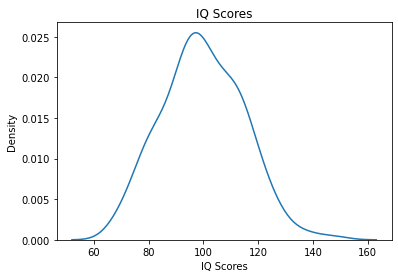

In [77]:
# your code here
#Question 1 : IQ scores (the mean is typically 100, SD = 15)
import pyforest
import scipy.stats
import math
import seaborn as sns
from numpy import random
sns.distplot(random.normal(loc = 100, scale = 15, size = 200), hist = False)
plt.title('IQ Scores')
plt.xlabel('IQ Scores')
plt.show


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

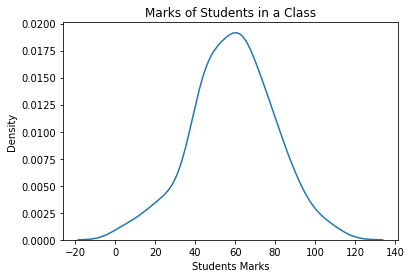

In [78]:
#Question 2 : Marks of students in a class (mean = 60, SD = 20)
sns.distplot(random.normal(loc = 60, scale = 20, size = 200), hist = False)
plt.title('Marks of Students in a Class')
plt.xlabel('Students Marks')
plt.show
#mu = 60
#sigma = 20
#z = np.linspace(mu-3*sigma, mu+3*sigma, 100)
##plt.plot(z, scipy.stats.norm.pdf(z, mu, sigma))
#plt.xlabel('Marks of students in the class')
#plt.show


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

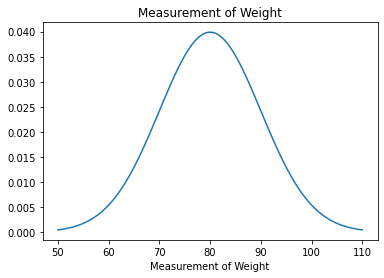

In [79]:
#Question 3: Measure of weight (mean = 80 kg, SD = 10)
mu = 80
sigma = 10
z = np.linspace(mu-3*sigma, mu+3*sigma, 100)
plt.plot(z, scipy.stats.norm.pdf(z, mu, sigma))
plt.title('Measurement of Weight')
plt.xlabel('Measurement of Weight')
plt.show


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

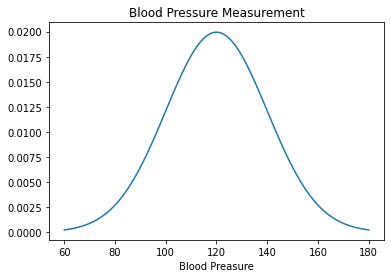

In [80]:
#Question 4: Measure of blood pressure (mean = 120/80, SD = 20)
mu = 120
sigma = 20
z = np.linspace(mu-3*sigma, mu+3*sigma, 100)
plt.plot(z, scipy.stats.norm.pdf(z, mu, sigma))
plt.title('Blood Pressure Measurement')
plt.xlabel('Blood Preasure')
plt.show


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show>

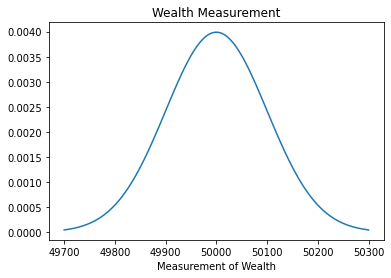

In [81]:
#Question 5: Measure of wealth (measurement in money; mean =  50,000,SD= 100)
mu = 50000
sigma = 100
z = np.linspace(mu-3*sigma, mu+3*sigma, 100)
plt.plot(z, scipy.stats.norm.pdf(z, mu, sigma))
plt.title('Wealth Measurement')
plt.xlabel('Measurement of Wealth')
plt.show
